In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Data Preparation and Exploration

In [2]:
data = pd.read_csv("exchange_rate.csv")

In [3]:
data.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [6]:
# parse the date column 
data['date'] = pd.to_datetime(data['date'], dayfirst=True)

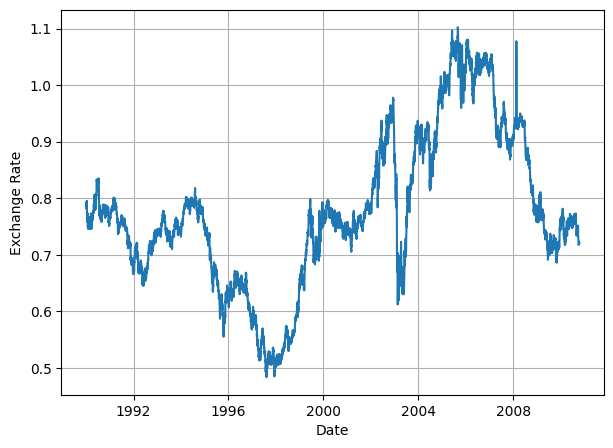

In [7]:
plt.figure(figsize=(7, 5))
plt.plot(data['date'],data['Ex_rate'])
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()

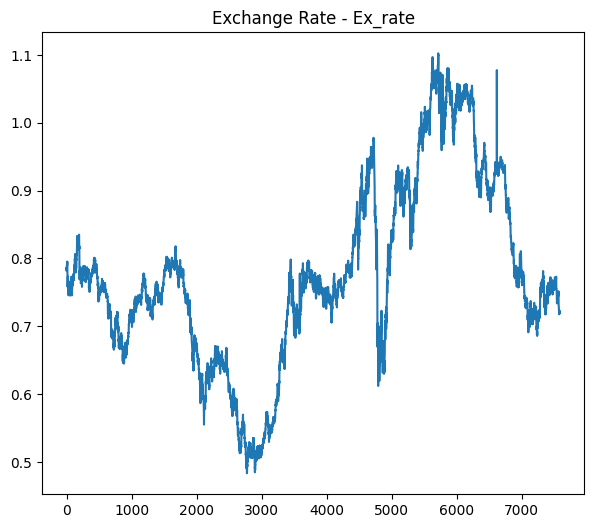

In [9]:
# plot time series for each currency
for currency in data.columns[1:]:
    data[currency].plot(subplots=True, figsize=(7,6))
    plt.title(f"Exchange Rate - {currency}")
    plt.show()

In [8]:
# Check for missing values
data.isnull().sum()

date       0
Ex_rate    0
dtype: int64

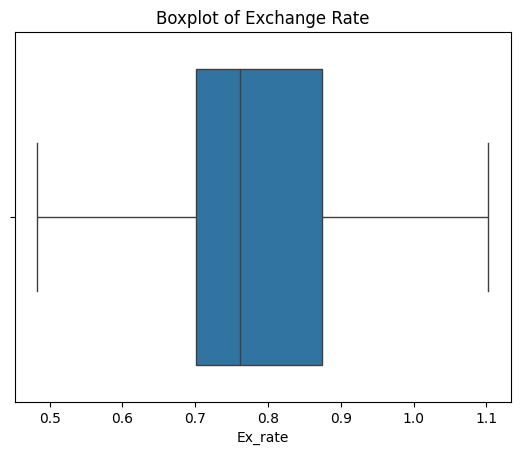

In [11]:
# Check for anomalies using boxplot
sns.boxplot(x=data['Ex_rate'])
plt.title('Boxplot of Exchange Rate')
plt.show()

# Part 2: Model Building - ARIMA

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

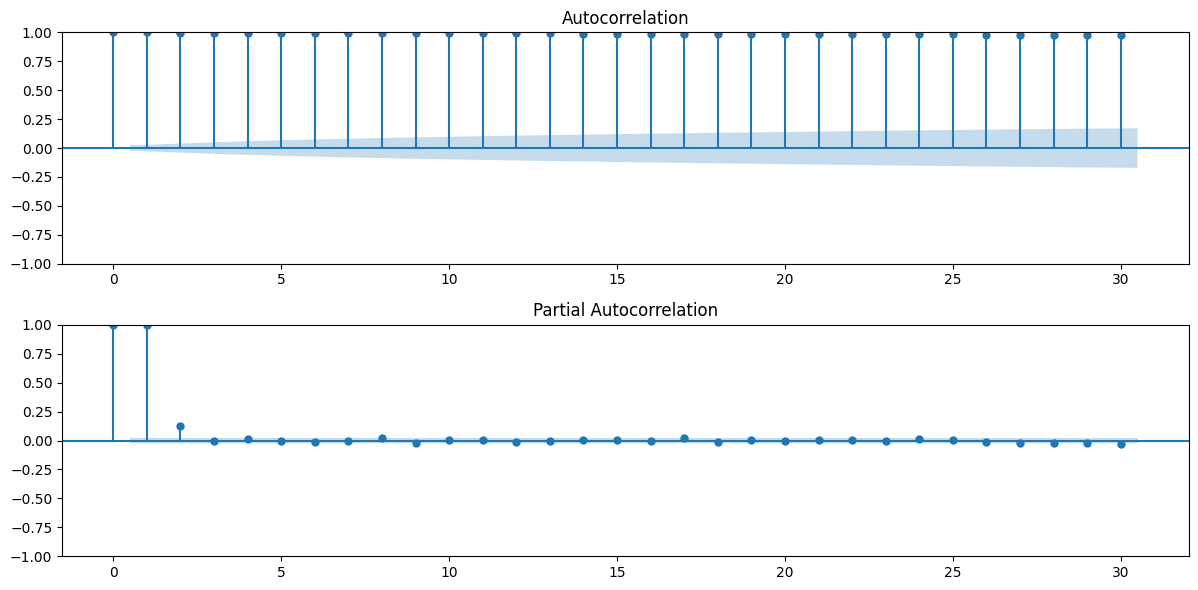

In [15]:

# Plot ACF and PACF to determine p, d, q
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(data['Ex_rate'], ax=plt.gca(), lags=30)
plt.subplot(212)
plot_pacf(data['Ex_rate'], ax=plt.gca(), lags=30)
plt.tight_layout()
plt.show()

In [16]:
#	Model Fitting
from statsmodels.tsa.arima.model import ARIMA

In [17]:
p, d, q = 1, 1, 1

# Fit ARIMA model
model = ARIMA(data['Ex_rate'], order=(p, d, q))
model_fit = model.fit()

In [19]:
# Print model summary
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sun, 19 Jan 2025   AIC                         -56102.322
Time:                        17:50:33   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865078.33
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

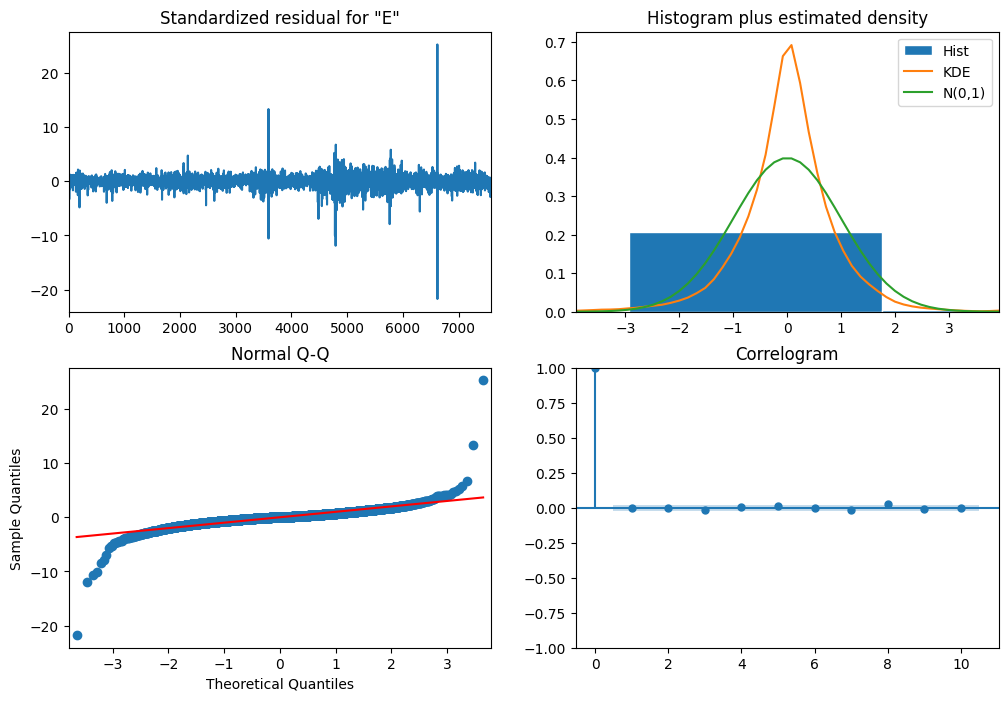

In [20]:
# Plot residual diagnostics
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

In [23]:
# Forecasting
# Forecast future values
forecast_steps = 30
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='D')[1:]
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

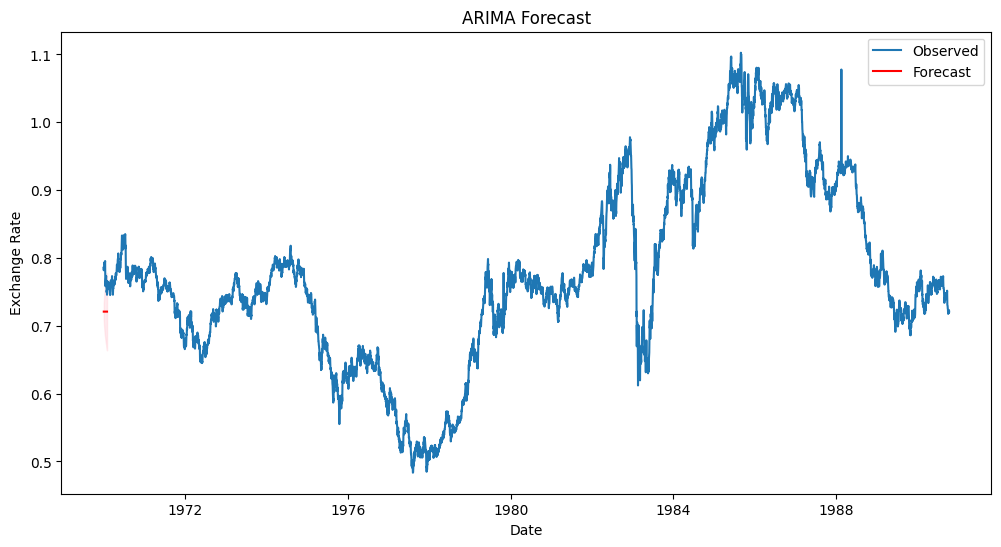

In [26]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Observed')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Part 3: Model Building - Exponential Smoothing

In [31]:
#	Model Selection
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [32]:
es_model = ExponentialSmoothing(data['Ex_rate'], seasonal='add', seasonal_periods=12)

In [33]:
#	Parameter Optimization
es_model_fit = es_model.fit(optimized=True)
es_model_fit.summary()

Dep. Variable:,Ex_rate,No. Observations:,7588
Model:,ExponentialSmoothing,SSE,0.273
Optimized:,True,AIC,-77628.560
Trend:,None,BIC,-77531.480
Seasonal:,Additive,AICC,-77628.488
Seasonal Periods:,12,Date:,"Sun, 19 Jan 2025"
Box-Cox:,False,Time:,17:58:08
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8698356,alpha,True
smoothing_seasonal,3.6668e-06,gamma,True


In [34]:
# Model Fitting and Forecasting
es_forecast = es_model_fit.forecast(steps=forecast_steps)

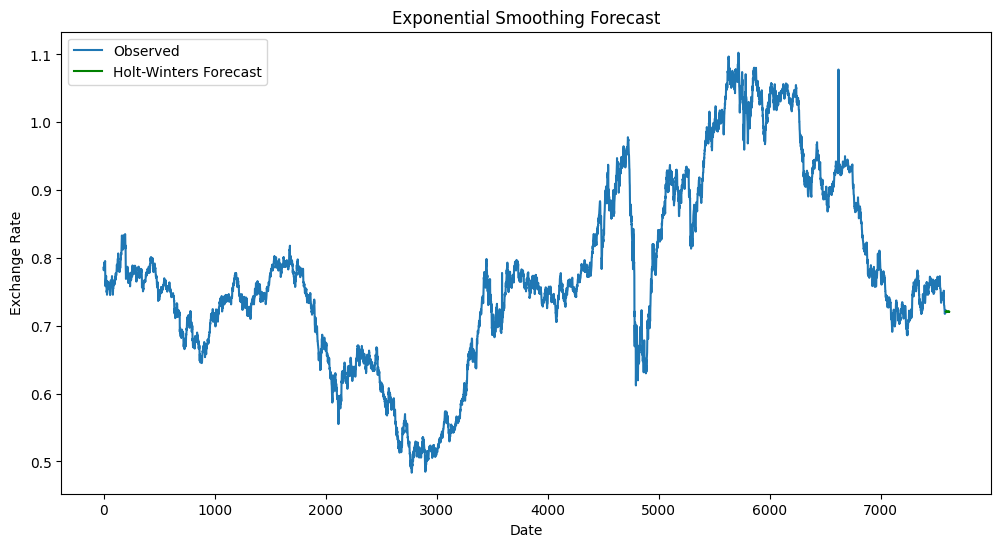

In [37]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Observed')
plt.plot(es_forecast.index, es_forecast, label='Holt-Winters Forecast', color='green')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Part 4: Evaluation and Comparison

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
arima_forecast = forecast_mean
mae_arima = mean_absolute_error(data['Ex_rate'][-forecast_steps:], arima_forecast)
rmse_arima = mean_squared_error(data['Ex_rate'][-forecast_steps:], arima_forecast)

In [48]:
# Compute metrics for Exponential Smoothing
mae_hw = mean_absolute_error(data['Ex_rate'][-forecast_steps:], es_forecast)
rmse_hw = mean_squared_error(data['Ex_rate'][-forecast_steps:], es_forecast)

In [49]:
# Print metrics
print(f"ARIMA - MAE: {mae_arima:.4f}, RMSE: {rmse_arima:.4f}")
print(f"Exponential Smoothing - MAE: {mae_hw:.4f}, RMSE: {rmse_hw:.4f}")

ARIMA - MAE: 0.0127, RMSE: 0.0003
Exponential Smoothing - MAE: 0.0129, RMSE: 0.0003


In [50]:
# Compare the models based on error metrics
print("Model Comparison:")
if mae_arima < mae_hw:
    print("ARIMA performed better.")
else:
    print("Exponential Smoothing performed better.")

Model Comparison:
ARIMA performed better.
